In [33]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt  
import copy

In [34]:
column_names = ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type']
train_data = pd.read_csv('4_data.csv', names=column_names, delim_whitespace=True, header=None)
# print(train_data.head())
y_train = train_data['RI'][1:].values
x_train = train_data['Al'][1:].values
x_train=x_train.astype(float)
y_train=y_train.astype(float)
print(x_train[0:5])
print(y_train[0:5])

[1.1  1.36 1.54 1.29 1.24]
[ 3.01 -0.39 -1.82 -0.34 -0.58]


/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_57826/4221147532.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('4_data.csv', names=column_names, delim_whitespace=True, header=None)


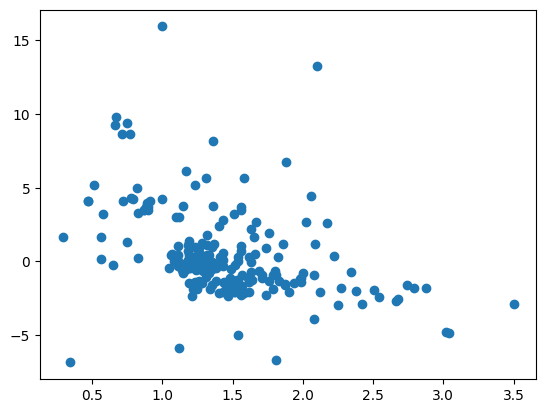

In [35]:
plt.scatter(x_train,y_train)
plt.show()

In [36]:
class Nadaraya_watson_kernel_guassian():
    def __init__(self,bandwidth=1.0):
        self.bandwidth=bandwidth
        self.x_data=None
        self.y_data=None
    def fit(self,x,y):
        self.x_data=x
        self.y_data=y
    def gaussian_kernel(self,x):
        ## (1/2*pi) e^{-x^2 / 2}
        exponent=np.exp(-0.5 * (x**2))
        result=exponent/np.sqrt(2*np.pi)
        return result
    def evaluate(self, x):
        temp = (x - self.x_data) / self.bandwidth
        ker = self.gaussian_kernel(temp)
        num = np.sum(ker * self.y_data)
        den = np.sum(ker)
        return num / den           
    

In [47]:
kde=Nadaraya_watson_kernel_guassian(bandwidth=0.05)
kde.fit(x_train,y_train)


In [40]:
x_min,x_max=x_train.min(),x_train.max()
x_range=np.linspace(x_min,x_max,1000)

In [41]:
print(y_train[0:5])

[ 3.01 -0.39 -1.82 -0.34 -0.58]


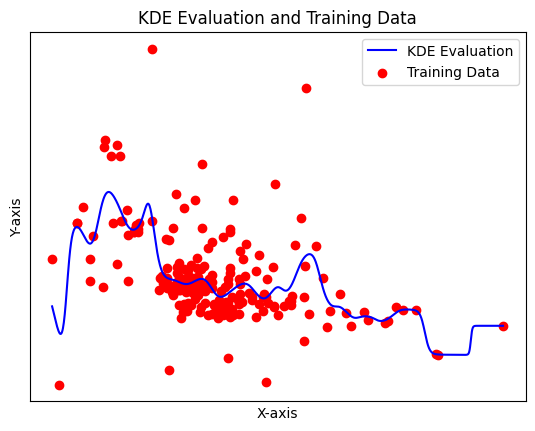

In [48]:
eval = []
for i in x_range:
    x = kde.evaluate(i)
    eval.append(x)
plt.plot(x_range, eval, label='KDE Evaluation', color='blue')
plt.scatter(x_train, y_train, label='Training Data', color='red')
plt.xticks([])  # Rotate the x-axis labels if needed, or you can remove this line
plt.yticks([])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('KDE Evaluation and Training Data')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(np.max(eval))